In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
titanic_data = pd.read_csv('data/train.csv')

In [3]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data summary
| Variable | Description | Notes |
| :- | :- | :- |
| PassengerId | | Irrelevant information for classification, however an important spectator for final cross-checking |
| Survived | Boolean coded as integer - 0 or 1 | Class label |
| Pclass | Ticket class | |
| Name | | Irrelevant information for classification and redundant with PassengerId - must be **dropped** |
| Sex | Passenger gender | Categorical data to be turned into dummies |
| Age | Passenger Age | Ordinal variable |
| SibSp | # of siblings / spouses aboard the Titanic | Ordinal variable |
| Parch | # of parents / children aboard the Titanic | Ordinal variable |
| Ticket | Ticket number | The level of relevance is not clear | 
| Fare | Passenger fare | The level of relevance is not clear |
| Cabin | Cabin number | Very likely irrelevant |
| Embark | Port of Embarkation (C, Q or S) | |

In [4]:
# Dropping Name
titanic_data = titanic_data.drop(columns='Name')

## Inspecting variables separetly first
### 1) Plotting 1D distribution 

In [5]:
variables_to_plot = list(titanic_data.columns)
variables_to_plot.remove('PassengerId')

n_variables = len(variables_to_plot)

categorical_variables = titanic_data.select_dtypes(exclude=['number','bool_']).columns

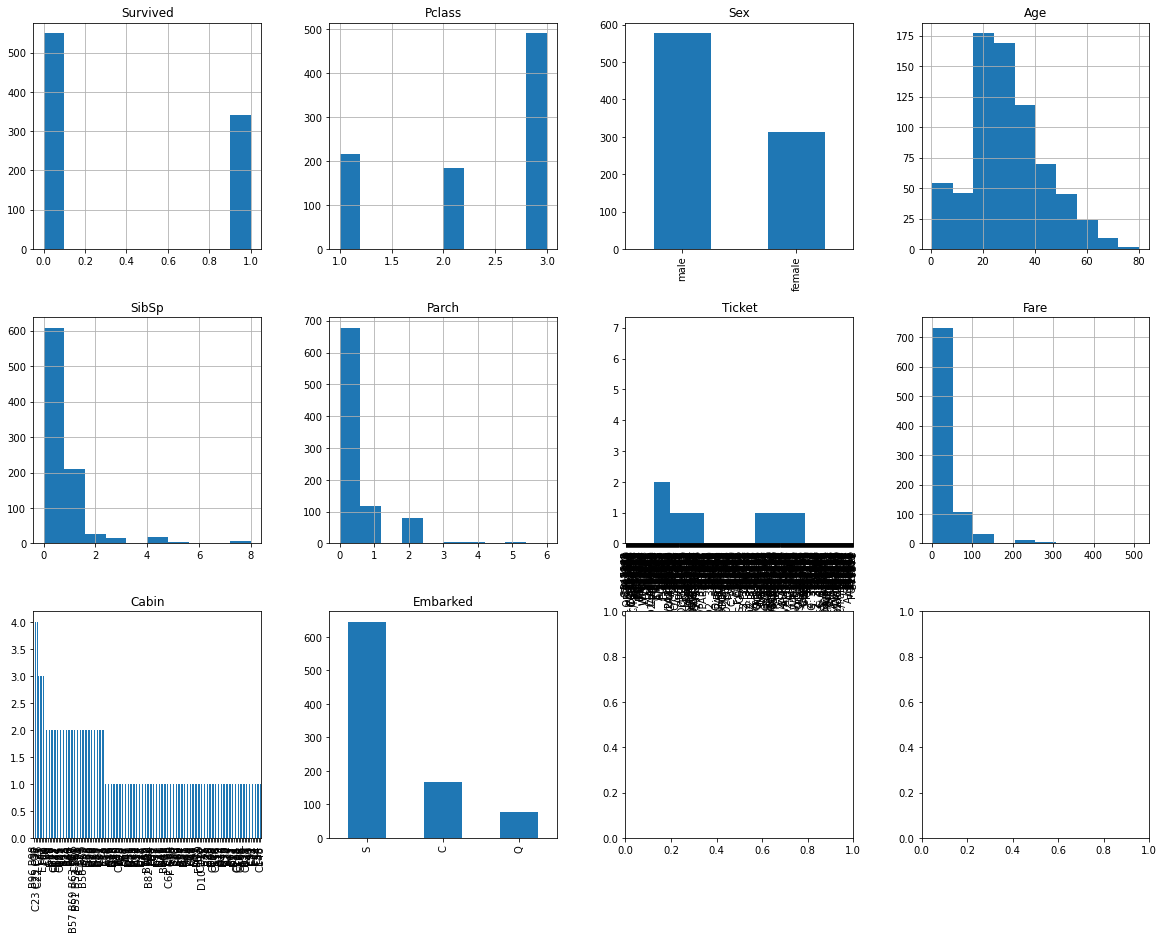

In [6]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

axs = axs.flatten()

for var, ax in zip(variables_to_plot, axs):
    if var in categorical_variables:
        titanic_data[var].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(var)
    else:
        titanic_data.hist(var, ax=ax)

- Ticket and Cabin are stored as categorical data and the number of categories seems to high.
- All other variables seem well behaved- nothing to worry about

### 2) Having a deeper look at Ticket and Cabin variables

### 2.1) Ticket

In [7]:
np.unique(titanic_data['Ticket'].values)

array(['110152', '110413', '110465', '110564', '110813', '111240',
       '111320', '111361', '111369', '111426', '111427', '111428',
       '112050', '112052', '112053', '112058', '112059', '112277',
       '112379', '113028', '113043', '113050', '113051', '113055',
       '113056', '113059', '113501', '113503', '113505', '113509',
       '113510', '113514', '113572', '113760', '113767', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787',
       '113788', '113789', '113792', '113794', '113796', '113798',
       '113800', '113803', '113804', '113806', '113807', '11668', '11751',
       '11752', '11753', '11755', '11765', '11767', '11769', '11771',
       '11774', '11813', '11967', '12233', '12460', '12749', '13049',
       '13213', '13214', '13502', '13507', '13509', '13567', '13568',
       '14311', '14312', '14313', '14973', '1601', '16966', '16988',
       '17421', '17453', '17463', '17464', '17465', '17466', '17474',
       '17764', '19877', '19928', '19943

Ticket variables contain entries in different formats. Some are single numbers and some have a pre-fix. This data is clearly not usable as it is. Instead of removing the Ticket variable from the dataset, I will try to extract useful information by grouping it into new categories. The assumption here is that different 'types' of tickets are possibly correlated with some other relevant feature of the passengers. A simplest one to to the grouping is separate the data between single numbers and not-single numbers.

In [8]:
def get_ticket_group(x):
    try:
        float(x)
        return 'number'
    except ValueError:
        return 'other'

<AxesSubplot:>

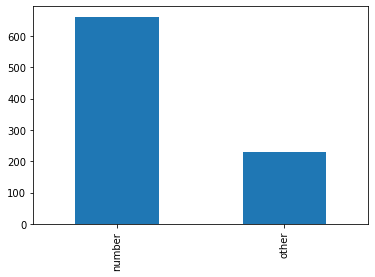

In [9]:
# Applying get_ticket_group
titanic_data['TicketGroup'] = titanic_data['Ticket'].map(get_ticket_group)
titanic_data['TicketGroup'].value_counts().plot(kind='bar')

### 2.2) Cabin

In [10]:
titanic_data['Cabin'].values

array([nan, 'C85', nan, 'C123', nan, nan, 'E46', nan, nan, nan, 'G6',
       'C103', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D56', nan,
       'A6', nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'B78', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'D33', nan, 'B30', 'C52', nan, nan, nan,
       nan, nan, 'B28', 'C83', nan, nan, nan, 'F33', nan, nan, nan, nan,
       nan, nan, nan, nan, 'F G73', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'E31', nan,
       nan, nan, 'A5', 'D10 D12', nan, nan, nan, nan, 'D26', nan, nan,
       nan, nan, nan, nan, nan, 'C110', nan, nan, nan, nan, nan, nan, nan,
       'B58 B60', nan, nan, nan, nan, 'E101', 'D26', nan, nan, nan,
       'F E69', nan, nan, nan, nan, nan, nan, nan, 'D47', 'C123', nan,
       'B86', nan, nan, nan, nan, nan, nan, nan, nan, 'F2', nan, nan,
       'C2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [11]:
nan_ratio = titanic_data['Cabin'].isna().sum() / len(titanic_data['Cabin'])
print(nan_ratio)

0.7710437710437711


77% of Cabin data is nan. Instead of removing Cabin from the dataset, I will create a new variable that indicates whether there is a Cabin number of not. This will be a Boolean variable and may contain some usefull information.

In [12]:
titanic_data['HasCabin'] = titanic_data['Cabin'].isna()

In [13]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketGroup,HasCabin
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,other,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,other,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,other,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,number,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,number,True


In [14]:
# Now I can drop Ticket and Cabin from the dataset
titanic_data = titanic_data.drop(columns=['Cabin', 'Ticket'])

In [15]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketGroup,HasCabin
0,1,0,3,male,22.0,1,0,7.2500,S,other,True
1,2,1,1,female,38.0,1,0,71.2833,C,other,False
2,3,1,3,female,26.0,0,0,7.9250,S,other,True
3,4,1,1,female,35.0,1,0,53.1000,S,number,False
4,5,0,3,male,35.0,0,0,8.0500,S,number,True


### 3) Checking for remaining missing values in the dataset

In [16]:
nan_ratio = titanic_data.dropna().shape[0] / titanic_data.shape[0]
nan_ratio

0.7991021324354658

Nan ratio seems to large (~ 80%). To avoid removing too much data, I will have a look where these nans are most frequent. If they come mostly from one variable, we might deal with it.

In [17]:
for col in titanic_data.columns:
    nan_ratio = np.sum(titanic_data[col].isna()) / len(titanic_data)
    print('Col {}, nan ratio = {}'.format(col, nan_ratio))

Col PassengerId, nan ratio = 0.0
Col Survived, nan ratio = 0.0
Col Pclass, nan ratio = 0.0
Col Sex, nan ratio = 0.0
Col Age, nan ratio = 0.19865319865319866
Col SibSp, nan ratio = 0.0
Col Parch, nan ratio = 0.0
Col Fare, nan ratio = 0.0
Col Embarked, nan ratio = 0.002244668911335578
Col TicketGroup, nan ratio = 0.0
Col HasCabin, nan ratio = 0.0


Most of the nan come from Age, which is an important variable and should not be removed. A small percentage comes from Embarked. These ones we will remove from the dataset.

In [18]:
titanic_data['HasAge'] = titanic_data['Age'].notna()

In [19]:
def process_nan_age(x):
    if np.isnan(x):
        return -1
    else:
        return x

In [20]:
titanic_data['NewAge'] = titanic_data['Age'].map(process_nan_age)
titanic_data = titanic_data.dropna(subset=['Embarked'])

In [21]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketGroup,HasCabin,HasAge,NewAge
0,1,0,3,male,22.0,1,0,7.2500,S,other,True,True,22.0
1,2,1,1,female,38.0,1,0,71.2833,C,other,False,True,38.0
2,3,1,3,female,26.0,0,0,7.9250,S,other,True,True,26.0
3,4,1,1,female,35.0,1,0,53.1000,S,number,False,True,35.0
4,5,0,3,male,35.0,0,0,8.0500,S,number,True,True,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,number,True,True,27.0
887,888,1,1,female,19.0,0,0,30.0000,S,number,False,True,19.0
888,889,0,3,female,NaN,1,2,23.4500,S,other,True,False,-1.0
889,890,1,1,male,26.0,0,0,30.0000,C,number,False,True,26.0


Now the missing values were all dealt with.

### 4) Turning categorical and bool data into dummies.


In [22]:
# Sex
df = pd.get_dummies(titanic_data['Sex'], drop_first=True)
titanic_data['IsMale'] = df['male']

In [23]:
# Embarked
df = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
titanic_data['EmbarkedQ'] = df['Q']
titanic_data['EmbarkedS'] = df['S']

In [24]:
# Pclass
df = pd.get_dummies(titanic_data['Pclass'], prefix='class', drop_first=False)
titanic_data['IsFirstClass'] = df['class_1']
titanic_data['IsSecondClass'] = df['class_2']

In [25]:
# HasCabin
df = pd.get_dummies(titanic_data['HasCabin'], prefix='cabin', drop_first=False)
titanic_data['HasCabin'] = df['cabin_True']

In [26]:
# HasTicket
df = pd.get_dummies(titanic_data['TicketGroup'], prefix='ticket', drop_first=False)
titanic_data['IsTicketNumber'] = df['ticket_number']

All categorical data are properly encoded now.

At this point, our dataset contains many variables that are redundant (e.g orinal ones and its enconded versions). This is useful since we will be testing different types of classifiers that could use different sets of variables. In order to simplify our life in the future steps, we will now split this dataset into one containing categorical data and a second one containing only numerical data (encoded variables).
Both datasets will be saved in csv format for future use.

### 5) Splitting the dataset (categorical and numerical ones) and saving them into csv files

In [27]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'TicketGroup', 'HasCabin', 'HasAge', 'NewAge',
       'IsMale', 'EmbarkedQ', 'EmbarkedS', 'IsFirstClass', 'IsSecondClass',
       'IsTicketNumber'],
      dtype='object')

In [28]:
titanic_data.to_csv('data/titanic_newAge_withCategorical.csv',
                    columns=['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
                             'Embarked', 'TicketGroup', 'HasCabin', 'HasAge', 'NewAge'])

titanic_data.to_csv('data/titanic_newAge_withEncoded.csv',
                    columns=['PassengerId', 'Survived', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'HasAge',
                             'NewAge', 'IsMale', 'EmbarkedQ', 'EmbarkedS', 'IsFirstClass', 'IsSecondClass',
                             'IsTicketNumber'])

In [29]:
titanic_data = titanic_data.dropna()

In [30]:
titanic_data.to_csv('data/titanic_withCategorical.csv',
                    columns=['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
                             'Embarked', 'TicketGroup', 'HasCabin'])

titanic_data.to_csv('data/titanic_withEncoded.csv',
                    columns=['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'IsMale',
                             'EmbarkedQ', 'EmbarkedS', 'IsFirstClass', 'IsSecondClass', 'IsTicketNumber'])

# THE END